In [52]:
import numpy as np
import pandas as pd

def generate_indices_csv(n, num_rows):
    indices = np.random.randint(1, n+1, size=(num_rows, n))
    indices_df = pd.DataFrame(indices)
    indices_df.to_csv('indices.csv', index=False, header=False)

n = 4
num_rows = 14
generate_indices_csv(n, num_rows)


In [54]:
import numpy as np
import pandas as pd

def assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df):
    global_stiffness_matrix = np.zeros((n, n))
    for i, row in indices_df.iterrows():
        index = row.tolist()
        for row in range(element_stiffness_matrices[i].shape[0]):
            for col in range(element_stiffness_matrices[i].shape[1]):
                global_stiffness_matrix[index[row]-1, index[col]-1] += element_stiffness_matrices[i][row, col]
    return global_stiffness_matrix

def generate_indices_csv(n, num_rows):
    indices = np.random.randint(1, n+1, size=(num_rows, n))
    indices_df = pd.DataFrame(indices)
    indices_df.to_csv('indices.csv', index=False, header=False)

def generate_element_stiffness_matrices(n):
    element_stiffness_matrices = [np.random.randint(1, 10, size=(n, n)) for i in range(n)]
    return element_stiffness_matrices

global_stiffness_matrix_order = 10
num_rows = 4
generate_indices_csv(global_stiffness_matrix_order, num_rows)
indices_df = pd.read_csv('indices.csv')
element_stiffness_matrices = generate_element_stiffness_matrices(global_stiffness_matrix_order)
global_stiffness_matrix = assemble_global_stiffness_matrix(global_stiffness_matrix_order, element_stiffness_matrices, indices_df)
print(global_stiffness_matrix)


[[ 21.  20.  29.  14.  59.   6.   6.   7.  16.   7.]
 [ 27.  10.  25.   8.  31.   9.   0.   0.   9.   4.]
 [ 32.  35.  46.  13.  35.   7.   0.   0.  14.   7.]
 [ 16.   8.   5.   9.  24.   0.   2.   4.   3.   4.]
 [ 67.  49.  62.  24. 143.   9.  20.  17.  40.  39.]
 [  8.  11.  14.   0.  11.   9.   0.   0.   6.   0.]
 [  8.   0.   0.   3.  22.   0.   8.   8.   4.   8.]
 [  9.   0.   0.   9.  11.   0.   6.   6.   8.   5.]
 [ 16.  19.  14.   9.  40.  14.   6.   2.  28.   5.]
 [ 16.   2.   4.  14.  29.   0.   8.   3.   3.  14.]]


In [55]:
import numpy as np
import pandas as pd

def assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df):
    global_stiffness_matrix = np.zeros((n, n))
    for i, row in indices_df.iterrows():
        index = row.tolist()
        for row in range(element_stiffness_matrices[i].shape[0]):
            for col in range(element_stiffness_matrices[i].shape[1]):
                global_stiffness_matrix[index[row]-1, index[col]-1] += element_stiffness_matrices[i][row, col]
    return global_stiffness_matrix

n = 10
element_stiffness_matrices = [np.array([[1, 2, 3, 4], [2, 3, 4, 1], [3, 4, 1, 2], [4, 1, 2, 3]]),
                             np.array([[5, 6, 7, 8], [6, 7, 8, 5], [7, 8, 5, 6], [8, 5, 6, 7]]),
                             np.array([[9, 10, 11, 12], [10, 11, 12, 9], [11, 12, 9, 10], [12, 9, 10, 11]]),
                             np.array([[13, 14, 15, 16], [14, 15, 16, 13], [15, 16, 13, 14], [16, 13, 14, 15]])]
indices_df = pd.read_csv('indices.csv')
global_stiffness_matrix = assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df)
print(global_stiffness_matrix)


[[10.  5. 14.  0.  3.  0.  4.  0.  0.  0.]
 [ 5.  7. 14.  0.  0.  0.  0.  0.  0.  0.]
 [14. 14. 35.  0. 10.  0.  0.  0. 21.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 3.  0. 10.  0. 21.  0.  5.  0. 23.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 4.  0.  0.  0.  5.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 21.  0. 23.  0.  0.  0. 40.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


[[ 1.  4.  0.  0.  0.  0.  0.  0.  0.  0.  3.  2.  0.  0.]
 [ 4.  3.  0.  0.  0.  0.  0.  0.  0.  0.  2.  1.  0.  0.]
 [ 0.  0. 12.  0.  8.  0.  0.  0.  0.  6.  8. 12.  0.  6.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  8.  0.  5.  0.  0.  0.  0.  7.  0.  6.  0.  0.]
 [ 0.  0.  0.  0.  0.  5.  7.  0.  0.  6.  0.  8.  0.  0.]
 [ 0.  0.  0.  0.  0.  7.  5.  0.  0.  8.  0.  6.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  6.  0.  7.  6.  8.  0.  0. 12.  0. 13.  0.  0.]
 [ 3.  2.  8.  0.  0.  0.  0.  0.  0.  0.  8. 10.  0.  5.]
 [ 2.  1. 12.  0.  6.  8.  6.  0.  0. 13. 10. 22.  0.  8.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  6.  0.  0.  0.  0.  0.  0.  0.  5.  8.  0.  7.]]


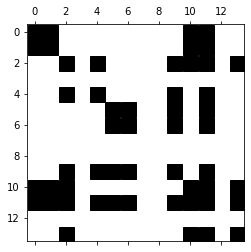

In [86]:
import numpy as np
import pandas as pd

def generate_indices_csv(filename, n, num_element_stiffness_matrices):
    indices = np.zeros((num_element_stiffness_matrices, 4), dtype=int)
    for i in range(num_element_stiffness_matrices):
        indices[i, :] = np.random.randint(1, n+1, 4)
    df = pd.DataFrame(indices, columns=['i1', 'i2', 'i3', 'i4'])
    df.to_csv(filename, index=False)

def assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df):
    global_stiffness_matrix = np.zeros((n, n))
    for i, row in indices_df.iterrows():
        index = row.tolist()
        for row in range(element_stiffness_matrices[i].shape[0]):
            for col in range(element_stiffness_matrices[i].shape[1]):
                if index[row] <= n and index[col] <= n:
                    global_stiffness_matrix[index[row]-1, index[col]-1] += element_stiffness_matrices[i][row, col]
    return global_stiffness_matrix

n = 14
num_element_stiffness_matrices = 4
element_stiffness_matrices = [np.array([[1, 2, 3, 4], [2, 3, 4, 1], [3, 4, 1, 2], [4, 1, 2, 3]]),
                             np.array([[5, 6, 7, 8], [6, 7, 8, 5], [7, 8, 5, 6], [8, 5, 6, 7]]),np.array([[5, 6, 7, 8], [6, 7, 8, 5], [7, 8, 5, 6], [8, 5, 6, 7]]),np.array([[5, 6, 7, 8], [6, 7, 8, 5], [7, 8, 5, 6], [8, 5, 6, 7]])]
filename = 'indices.csv'
generate_indices_csv(filename, n, num_element_stiffness_matrices)
indices_df = pd.read_csv(filename)
global_stiffness_matrix = assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df)
print(global_stiffness_matrix)
# Plot the global stiffness matrix as a sparse plot array
plt.spy(global_stiffness_matrix, markersize=15, color='black')
plt.show()
# Save the global stiffness matrix in a text file
np.savetxt("global_stiffness_matrix.txt", global_stiffness_matrix, fmt='%d')


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


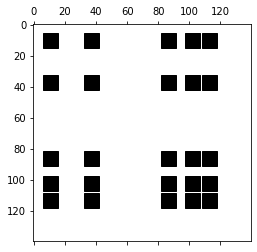

In [78]:
import numpy as np
import pandas as pd

def generate_indices_csv(filename, n, num_element_stiffness_matrices):
    indices = np.zeros((num_element_stiffness_matrices, 5), dtype=int)
    for i in range(num_element_stiffness_matrices):
        indices[i, :] = np.random.randint(1, n+1, 5)
    df = pd.DataFrame(indices, columns=['i1', 'i2', 'i3', 'i4', 'i5'])
    df.to_csv(filename, index=False)

def assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df):
    global_stiffness_matrix = np.zeros((n, n))
    for i, row in indices_df.iterrows():
        index = row.tolist()
        for row in range(element_stiffness_matrices[i].shape[0]):
            for col in range(element_stiffness_matrices[i].shape[1]):
                if index[row] <= n and index[col] <= n:
                    global_stiffness_matrix[index[row]-1, index[col]-1] += element_stiffness_matrices[i][row, col]
    return global_stiffness_matrix

n = 140
num_element_stiffness_matrices = 1
element_stiffness_matrices = [np.array([[1, 2, 3, 4, 5], [2, 3, 4, 5, 1], [3, 4, 5, 1, 2], [4, 5, 1, 2, 3], [5, 1, 2, 3, 4]]),
                             np.array([[5, 6, 7, 8, 9], [6, 7, 8, 9, 5], [7, 8, 9, 5, 6], [8, 9, 5, 6, 7], [9, 5, 6, 7, 8]])]
filename = 'indices.csv'
generate_indices_csv(filename, n, num_element_stiffness_matrices)
indices_df = pd.read_csv(filename)
global_stiffness_matrix = assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df)
print(global_stiffness_matrix)
# Plot the global stiffness matrix as a sparse plot array
plt.spy(global_stiffness_matrix, markersize=15, color='black')
plt.show()


[[6. 0.]
 [0. 0.]]


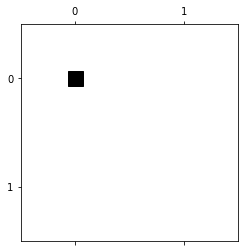

In [85]:
import numpy as np
import pandas as pd

def generate_indices_csv(filename, n, num_element_stiffness_matrices):
    indices = np.zeros((num_element_stiffness_matrices, 2), dtype=int)
    for i in range(num_element_stiffness_matrices):
        indices[i, :] = np.random.randint(1, n+1, 2)
    df = pd.DataFrame(indices, columns=['i1', 'i2'])
    df.to_csv(filename, index=False)

def assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df):
    global_stiffness_matrix = np.zeros((n, n))
    for i, row in indices_df.iterrows():
        index = row.tolist()
        for row in range(element_stiffness_matrices[i].shape[0]):
            for col in range(element_stiffness_matrices[i].shape[1]):
                if index[row] <= n and index[col] <= n:
                    global_stiffness_matrix[index[row]-1, index[col]-1] += element_stiffness_matrices[i][row, col]
    return global_stiffness_matrix

n = 2
num_element_stiffness_matrices = 1
element_stiffness_matrices = [np.array([[1, 2], [2, 1]])]
filename = 'indices.csv'
generate_indices_csv(filename, n, num_element_stiffness_matrices)
indices_df = pd.read_csv(filename)
global_stiffness_matrix = assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df)
print(global_stiffness_matrix)
# Plot the global stiffness matrix as a sparse plot array
plt.spy(global_stiffness_matrix, markersize=15, color='black')
plt.show()


In [81]:
import numpy as np
import pandas as pd

def generate_indices_csv(filename, n, num_element_stiffness_matrices):
    indices = np.zeros((num_element_stiffness_matrices, 6), dtype=int)
    for i in range(num_element_stiffness_matrices):
        indices[i, :] = np.random.randint(1, n+1, 6)
    df = pd.DataFrame(indices, columns=['i1', 'i2', 'i3', 'i4', 'i5','i6'])
    df.to_csv(filename, index=False)

def assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df):
    global_stiffness_matrix = np.zeros((n, n))
    for i, row in indices_df.iterrows():
        index = row.tolist()
        for row in range(element_stiffness_matrices[i].shape[0]):
            for col in range(element_stiffness_matrices[i].shape[1]):
                if index[row] <= n and index[col] <= n:
                    global_stiffness_matrix[index[row]-1, index[col]-1] += element_stiffness_matrices[i][row, col]
    return global_stiffness_matrix

n = 14
num_element_stiffness_matrices = 1
element_stiffness_matrices = [np.array([[1, 2, 3, 4, 5], [2, 3, 4, 5, 1], [3, 4, 5, 1, 2], [4, 5, 1, 2, 3], [5, 1, 2, 3, 4],[5, 1, 2, 3, 4]])]
filename = 'indices.csv'
generate_indices_csv(filename, n, num_element_stiffness_matrices)
indices_df = pd.read_csv(filename)
global_stiffness_matrix = assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df)
print(global_stiffness_matrix)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 5. 0. 0. 0. 1. 4. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 9. 0. 0. 0. 9. 5. 0. 7. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 9. 0. 0. 0. 3. 1. 0. 2. 0. 0.]
 [0. 0. 0. 0. 5. 0. 0. 0. 1. 4. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 7. 0. 0. 0. 2. 5. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
